In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from keras.backend import tf as ktf
from keras.models import load_model
import PIL.Image as Image
import glob

Using TensorFlow backend.


## Load model

In [2]:
model = load_model('my_model.h5', custom_objects={"ktf": ktf})

# Predict Images

In [3]:
images=[]
prediction = []
for fn in glob.iglob('test_images/test*.jpg'):
    rgb = np.array(Image.open(fn))
    images.append(rgb)
    
    lab = cv2.cvtColor(rgb, cv2.COLOR_RGB2Lab);
    data = lab[np.newaxis,:,:,:]
    
    response = model.predict(data)
    response = response*255
    response = response.reshape((180,320))
    response[:100,...]=0
    response = response.astype(np.uint8)
    
    prediction.append(response)

# Plot Images

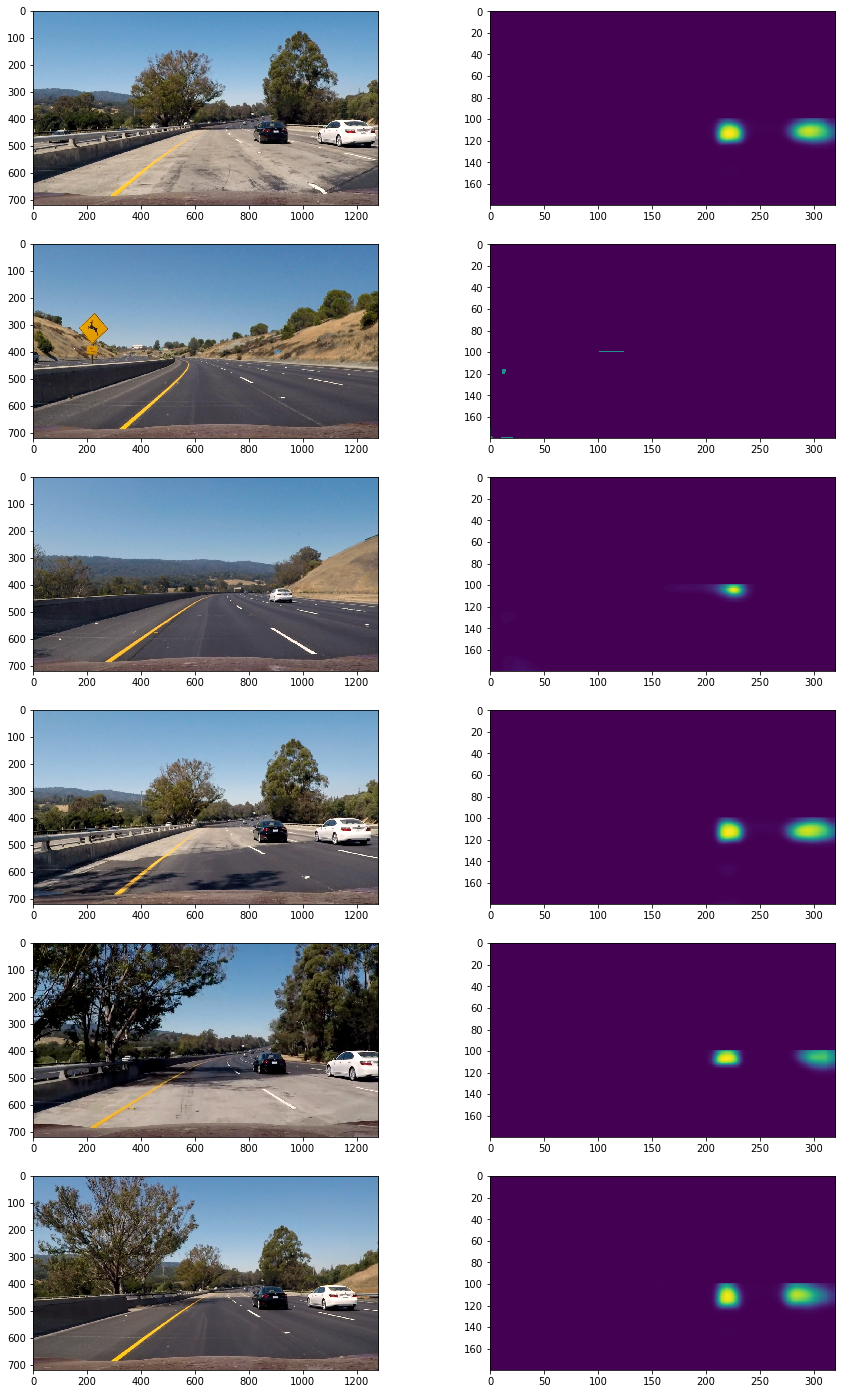

In [4]:
fig,axs = plt.subplots(len(prediction),2, figsize=(15, 25))
axs = axs.reshape(-1)
for i,ax in enumerate(axs):
    if i%2:
        ax.imshow(prediction[i//2])
    else:
        ax.imshow(images[i//2])
